<a href="https://colab.research.google.com/github/MarinaWolters/Coding-Tracker/blob/master/HandsOn10_CNN_Pytorch_Nan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary
* Popular libraries that implement Neural Network? Why PyTorch?
* Fully connected Neural Network for classification.
* What is Convolutional Neural Network (CNN)? Tools to explore inside CNN
* The essential steps to train a CNN.
* Train and evaluate with PyTorch

Refer to [Training a Classifier with PyTorch](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html). Note there are some functions that has been updated, like new version of PyTorch uses inference_mode instead of no_grad.

Thanks to Daniel Bourke for inspiring examples and tricks. 

# PyTorch
1. [PyTorch](https://pytorch.org/docs/stable/index.html) is an open source machine learning and deep learning framework.
2. PyTorch is more flexible and popular but slightly slower compare to other platform (improved recently)
  * Very user friendly. 
  * Very flexible, allowing for more low-level customization and experimentation with new ideas compared with Tensorflow and MXNet
  * Researchers love it and the most advanced models are using it.[Trend](https://paperswithcode.com/trends)
  * Leading technology companies using PyTorch: Tesla, OpenAI




## Basics with PyTorch


### Tensor Basic Examples

In [ ]:
import torch

**Scalar**: 0 dimension tensor

In [ ]:
# Scalar
scalar = torch.tensor(1)
print(scalar)
# dimension of tensor
print(f"dimension of scalar:{scalar.ndim}")
# From scalar 0-dim tensor to python numbers
scalar.item()

tensor(1)
dimension of scalar:0


1

**Vector**: 1 dimension tensor

In [ ]:
# Vector
vector = torch.tensor([1,2])
print(vector)
# dimensin of tensor
print(f"dimension of vector: {vector.ndim}")
vector.shape

tensor([1, 2])
dimension of vector: 1


torch.Size([2])

**Matrix**: 2 dimension tensor

In [ ]:
matrix = torch.tensor([[1,2],[3,4]])
print(matrix)
print(f"dimension of matrix: {matrix.ndim}")
print(f"shape of matrix: {matrix.shape}")

tensor([[1, 2],
        [3, 4]])
dimension of matrix: 2
shape of matrix: torch.Size([2, 2])


**More dimensions** tensors, explore by yourself!

There are different [types of tensor](https://pytorch.org/docs/stable/tensors.html).

### Tensors on GPUs and CPUs
Computation with Tensors on GPUs runs faster than CPU.

**Enabling GPU in Colab** Go to Edit | Notebook Settings and make sure you have enabled _Hardware Accelerator - GPU_

**The tensor used on GPU cannot be directly used on CPU, you have to transfer it from GPU to CPU, vice versa**. You will see torch.cuda as the GPU device, since Nvidia GPUs use a computing tookit called CUDA.

In [ ]:
# if you don't have a nvidia gpu, you will not see this
!nvidia-smi

Thu Mar 30 21:42:03 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    34W /  70W |   1073MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!nvidia-smi

Thu Mar 30 21:42:04 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    34W /  70W |   1073MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# check for GPU
import torch
torch.cuda.is_available()

True

In [ ]:
# A better practice is to set up the device, if you re-run it and the gpu is not available, your code still works well
device = "cuda" if torch.cuda.is_available() else 'cpu'
device

'cuda'

**Moving tensor from cpu to gpu and gpu to cpu**

In [ ]:
# by default, when creating a tensor, it's on cpu
data = torch.tensor([1,2])
print(data.device)
# Put tensor on gpu
data_on_gpu = data.to(device)
data_on_gpu

cpu


tensor([1, 2], device='cuda:0')

In [ ]:
# If the data is on gpu, cannot transform it to numpy data
data_back_on_cpu = data_on_gpu.cpu().numpy()
data_back_on_cpu

array([1, 2])

# Fully Connected Neural Network for Classification

Essential components of a fully connected neural network:
* Input layer (shape /  in_features)
* Hidden layers
* Neurons in each hidden layers
  * Generally from 10 to 512, 
* Activation function in each hidden layer
  * Relu
  * Sigmoid
  * Tanh
* Output layer (shape / out_features)
* Output activation function
  * sigmoid for binary classification
  * softmax for multiclass classification
* Loss function
  * binary cross entropy binary class
  * cross entropy for multiclass 
* Optimizer
  * see torch.optim, mostly SGD and Adam


In [ ]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn

# Check versions. It's a good practice to print versions in your neural network code.
# this is a fast developing field, now working code does not imply working in the future
print(f"PyTorch version: {torch.__version__}")

PyTorch version: 1.13.1+cu116


In [ ]:
n_samples = 1000

data, label = make_circles(n_samples, noise = 0.04, random_state=42)

In [ ]:
data[:3], label[:3]

(array([[ 0.74822656,  0.23908325],
        [-0.74509559,  0.16097526],
        [-0.82262532,  0.19762051]]),
 array([1, 1, 1]))

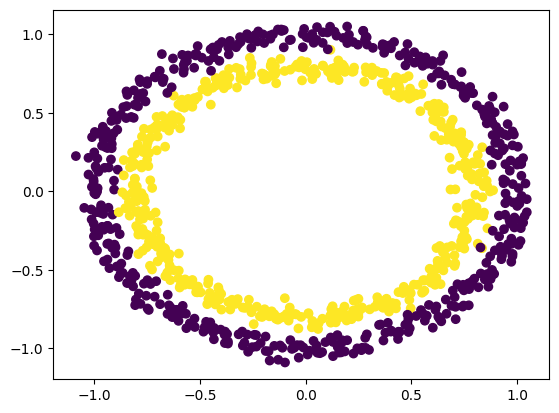

In [ ]:
plt.scatter(x=data[:,0], y=data[:,1], c=label)

## Classification of points

### Prepare data with tensor format and split into train and test

In [ ]:
# from numpy array to tensor
data = torch.from_numpy(data).type(torch.float) 
label = torch.from_numpy(label).type(torch.float) 

In [ ]:
data[0], label[0]

(tensor([0.7482, 0.2391]), tensor(1.))

In [ ]:
# Split to train and test data set
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)

### Build the Neural Network
1. Set up device
2. Define the model class
3. Loss function
4. Optimizer
5. Training loop

1. Set up device

In [ ]:
## 1. Set up device
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

2. To define model:
 * Create a the model class as the subclass of nn.Module. Almost all PyTorch models are subclasses of nn.Module.
 * Define a forward() methord. How to do forward computation? Take input data how to achieve to lables.
 * Create an instance of the model and send to the device

**Pay attention to the shape of input and output between each layer**
* The output of previous layer should be the same as the shape of the input of next layer
* Explore the purpose of activation function
* The difference of more layers and more hidden units

**What is a neural network layer?**

$ Y=\sum weights * x + bias $

In [ ]:
# Parameters inside a layer
layer = nn.Linear(in_features=2, out_features=10) 
layer.state_dict()

OrderedDict([('weight',
              tensor([[-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802],
                      [-0.3258, -0.0829],
                      [-0.2872,  0.4691]])),
             ('bias',
              tensor([-0.5582, -0.3260, -0.1997, -0.4252,  0.0667, -0.6984,  0.6386, -0.6007,
                       0.5459,  0.1177]))])

In [ ]:
# 2. Define the model class
class ClassificationNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(in_features=2, out_features=10) 
    self.fc2 = nn.Linear(10, 10)
    self.fc3 = nn.Linear(10, 1)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)
    # Above is the same as 
    # net = nn.Sequential(self.fc1, self.relu, self.fc2, self.relu, self.fc3)
    # return net(x)
    return x

netFC = ClassificationNet().to(device)
netFC


ClassificationNet(
  (fc1): Linear(in_features=2, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

Now we created a fully connected layer. You can take a look at the network we just created in the [playground](https://playground.tensorflow.org/)

3 & 4. Loss function and optimizer

PyTorch has two binary corss entropy: `torch.nn.BCELoss()`, `torch.nn.BCEWithLogitsLoss()`. `BCEWithLogitsLoss()` is the `BCELoss()` with `Sigmoid` built in.

In [ ]:
# 3. Loss function
criterion = nn.BCEWithLogitsLoss()
# 4. Optimizer
optimizer = torch.optim.Adam(params=netFC.parameters(), lr=0.1) # Adam optimizer with learning rate = 0.1

### Train the Neural Network
In one loop, we need to:
1. Zero gradients
2. Forward pass
3. Calcuate the loss
4. Backward propogation
5. Optimizer steps

What are each above steps doing?

What are the important parameters we need to adjust?
* Learning rate
* Activation function
* Number of layers
* Number of hidden units

In [ ]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [ ]:
torch.manual_seed(42)

# Set the number of loops
epochs = 100

# Put data to device, sklearn is working on cpu, now we need to put data to cuda
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    netFC.train() # set to training mode, nn.Module default on training, so can ignore

    # 1.zero grad
    optimizer.zero_grad()

    # 2. forward
    y_logits = netFC(X_train).squeeze() # squeeze to remove extra `1` dimensions
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls(0,1)
  
    # 3. loss & accuracy
    loss = criterion(y_logits, y_train) 
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred) 

   

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    netFC.eval()
    with torch.inference_mode():
        # 1. forward
        test_logits = netFC(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2.loss & accuracy
        test_loss = criterion(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69470, Accuracy: 50.00% | Test loss: 0.70412, Test acc: 50.00%
Epoch: 10 | Loss: 0.57692, Accuracy: 81.75% | Test loss: 0.55460, Test acc: 83.00%
Epoch: 20 | Loss: 0.30860, Accuracy: 85.88% | Test loss: 0.27630, Test acc: 91.00%
Epoch: 30 | Loss: 0.13070, Accuracy: 97.12% | Test loss: 0.16469, Test acc: 96.50%
Epoch: 40 | Loss: 0.06301, Accuracy: 99.50% | Test loss: 0.11427, Test acc: 95.00%
Epoch: 50 | Loss: 0.03833, Accuracy: 99.75% | Test loss: 0.07834, Test acc: 98.00%
Epoch: 60 | Loss: 0.02800, Accuracy: 99.62% | Test loss: 0.06342, Test acc: 97.50%
Epoch: 70 | Loss: 0.02161, Accuracy: 99.88% | Test loss: 0.05744, Test acc: 97.50%
Epoch: 80 | Loss: 0.01778, Accuracy: 99.75% | Test loss: 0.05199, Test acc: 98.50%
Epoch: 90 | Loss: 0.01523, Accuracy: 99.75% | Test loss: 0.04727, Test acc: 98.50%


In [ ]:
X_test_cpu = X_test.cpu().detach().numpy()
test_pred_cpu = test_pred.cpu().detach().numpy()

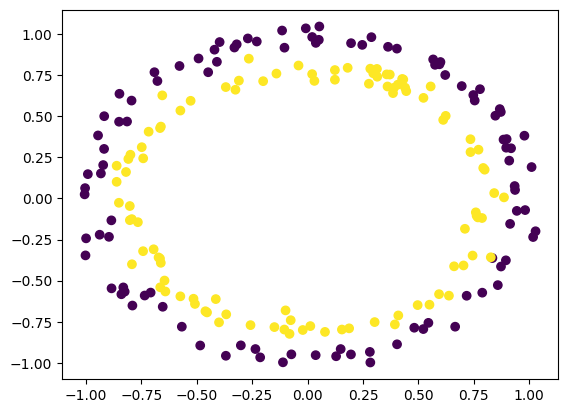

In [ ]:
# Plot prediction results
plt.scatter(x=X_test_cpu[:,0], y=X_test_cpu[:,1], c=test_pred_cpu)

### The importance of activation function
Adds **non-linearity** to the model. Try if we remove relu in the above `ClassificationNet` model.

# Prepare Data for Convolutional Neural Network 

As we are using MNIST in our lecture videos, you are probably familiar with the MNIST dataset. It is a large collection of handwritten digits that has been used for computer vision research for many years. It is like the "hello world" dataset for computer vision and may not provide a sufficiently challenging test for CNN models due to its relatively simple nature. So there are some guys created FashionMNIST. 

The Fashion-MNIST dataset comprises of 60,000 examples in the training set and 10,000 examples in the test set, each of which is a grayscale image of 28x28 pixels associated with one of 10 class labels. The dataset was created by Zalando, an online fashion retailer in Germany, by collecting images from their own website and other fashion retailers, and labeling them manually.

Fashion-MNIST has been designed to serve as a direct substitute for the original MNIST dataset for evaluating machine learning algorithms, as it shares the same image size and training/testing splits. Due to its popularity, it is commonly used in research pertaining to computer vision and natural language processing, in addition to its role as a benchmark dataset for machine learning models.

We are going to use [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). 
`torchvision.datasets` contains a lot of datasets you can play around. FashionMNIST is one of those datasets.

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor, transforms
from torch.utils.data import DataLoader

# Check versions. It's a good practice to print versions in your neural network code. 
# this is a fast developing field, now working code does not imply working in the future
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 1.13.1+cu116
torchvision version: 0.14.1+cu116


Transform the dataset while loading. You might want to:
* Resize the images. 
* Turn the data into tensor. Images comes with Python Image Library (PIL) format and we need to turn them into PyTorch Tensors.

In [ ]:
## Set up device
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
transform = transforms.Compose([ToTensor()])

In [ ]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # directory to download data
    train=True, # want training?
    download=True, 
    transform=transform, 
    target_transform=None # don't transform labels for this dataset
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # not training but testing
    download=True,
    transform=transform
)

image: torch.Size([1, 28, 28])
label: 9


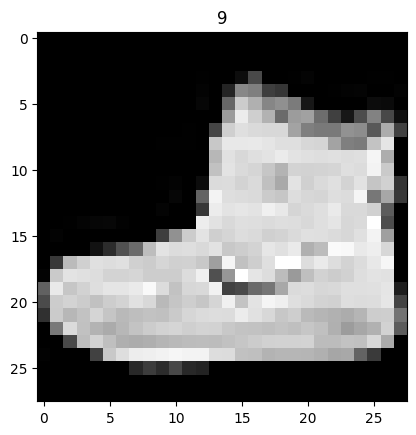

In [ ]:
# take a look at the first data sample
print(f"image: {train_data[0][0].shape}")
print(f"label: {train_data[0][1]}")
image, label = train_data[0]
plt.imshow(image.squeeze(), cmap='gray') 
plt.title(label);

In [ ]:
print(train_data.classes)
class_names = train_data.classes
class_names[9]

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


'Ankle boot'

In [ ]:
# Number of samples
print(len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets))


60000 60000 10000 10000


### Prepare dataloader from dataset
 The DataLoader function is used to load data into a model for both training and inference purposes. It functions by transforming a sizable Dataset into a Python iterable containing smaller chunks, which are referred to as batches or mini-batches. The batch size for these mini-batches can be set using the appropriate parameter.

In [ ]:
# How many to compute in a batch
BATCH_SIZE = 32

# Load datasets as iterables of batches
train_dataloader = DataLoader(train_data, 
    batch_size=BATCH_SIZE, 
    shuffle=True # in case some dataset are ordered
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False 
)


# Convolutional Neural Network

Typical Structure: Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Flatten Layer -> [Fully Connected Layer]+ -> Output layer

**Useful Resources:**

Building blocks in Neural Network: [torch.nn](https://pytorch.org/docs/stable/nn.html)

What's inside each layer:
[CNN Explainer](https://poloclub.github.io/cnn-explainer/)

Parameters in Convolutional layer: [nn.Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d)




The most beautiful part of the convolutional blocks is that they automatically extract important features without requiring explicit instructions. These features are then forwarded to the fully connected layer for classification. Thus, there is no need to specify beforehand which features the model should consider, as the convolutional layer performs this task automatically.

**How to start build a model?**

You can start with some existing pre-trained models. [torchvision.models](https://pytorch.org/vision/0.8/models.html).

Here we are using the TinyVGG structure from CNN Explainer.

Some parameters before build the CNN:
* input channels of each layer
* output channels of each layer
* kernel size
* stride
* padding

In [ ]:
# Create a convolutional neural network 
class ConvNet(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, 
                      stride=1, 
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        #print(x.shape)
        x = self.block_2(x)
        #print(x.shape)
        x = self.classifier(x)
        #print(x.shape)
        return x


In [ ]:
torch.manual_seed(42)
netCNN = ConvNet(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)
netCNN

ConvNet(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

**Trick to know the shape of input of certain layer**

Use a dummy input, and print the torch shape after each block/layer

In [ ]:
# dummy input with the same shape of our data
rand_image_tensor = torch.randn(size=(1,28,28))
print(rand_image_tensor.shape)
netCNN(rand_image_tensor.unsqueeze(0).to(device))

torch.Size([1, 28, 28])


tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

### Set Loss and Optimizer to prepare training

In [ ]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=netCNN.parameters(), lr=0.1) # Adam also perform good on classification problems

###Train the Neural Network
In one loop, we need to:

1. Zero gradients
2. Forward pass
3. Calcuate the loss
4. Backward propogation
5. Optimizer steps

In [ ]:
torch.manual_seed(42)

epochs = 5 # start with small number to make sure it's on the right direction, change to larger later

# Create training and testing loop
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device) # I forgot to send the data to device during my OOH, sorry for that :)
        netCNN.train() # set the mode to training mode
        # 1. zero grad
        optimizer.zero_grad()

        # 2. forward
        y_pred = netCNN(X)

        # 3. loss 
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 
        
        # 4. backward
        loss.backward()

        # 5. optimizer step
        optimizer.step()

        # Print
        if batch % 500 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)
    
    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy 
    test_loss, test_acc = 0, 0 
    netCNN.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device) 
            # 1. Forward pass
            test_pred = netCNN(X)
           
            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")


Epoch: 0
-------
Looked at 0/60000 samples
Looked at 16000/60000 samples
Looked at 32000/60000 samples
Looked at 48000/60000 samples

Train loss: 0.36125 | Test loss: 0.35467, Test acc: 86.92%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 16000/60000 samples
Looked at 32000/60000 samples
Looked at 48000/60000 samples

Train loss: 0.32534 | Test loss: 0.33009, Test acc: 87.50%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 16000/60000 samples
Looked at 32000/60000 samples
Looked at 48000/60000 samples

Train loss: 0.30398 | Test loss: 0.30484, Test acc: 88.94%

Epoch: 3
-------
Looked at 0/60000 samples
Looked at 16000/60000 samples
Looked at 32000/60000 samples
Looked at 48000/60000 samples

Train loss: 0.28960 | Test loss: 0.33028, Test acc: 88.26%

Epoch: 4
-------
Looked at 0/60000 samples
Looked at 16000/60000 samples
Looked at 32000/60000 samples
Looked at 48000/60000 samples

Train loss: 0.27856 | Test loss: 0.29950, Test acc: 89.43%



Let's sample 9 images and see how the prediction works.

In [ ]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)
pred_probs = []
netCNN.eval()
with torch.inference_mode():
    for sample in test_samples:
        sample = torch.unsqueeze(sample, dim=0).to(device)
        pred_logit = netCNN(sample)
        pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
        pred_probs.append(pred_prob.cpu())

pred_classes = torch.stack(pred_probs).argmax(dim=1)

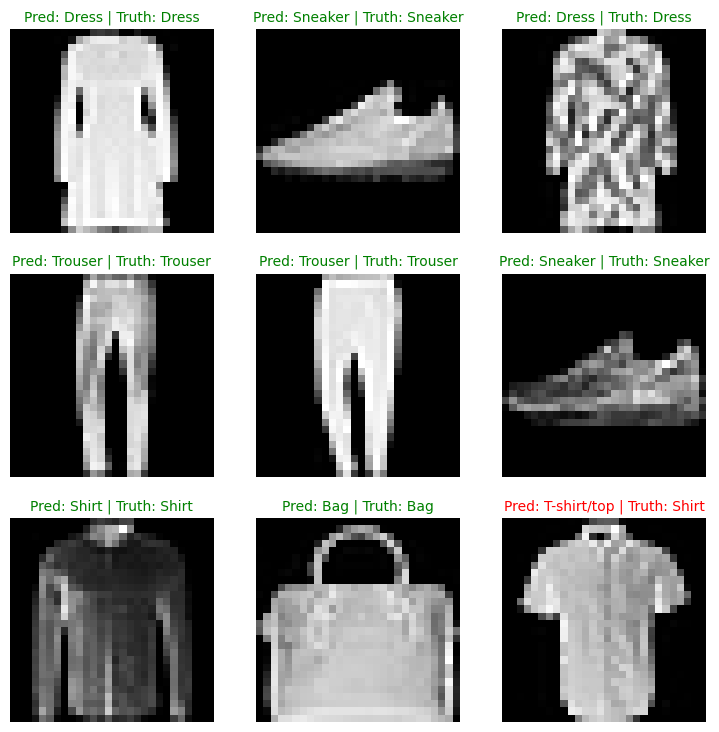

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap="gray")
  pred_label = class_names[pred_classes[i]]
  truth_label = class_names[test_labels[i]] 

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. zero grad
        optimizer.zero_grad()

        # 2. forward
        y_pred = model(X)

        # 3. loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # why argmax here?

        # 4. backward
        loss.backward()

        # 5. optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. forward
            test_pred = model(X)
            
            # 2. loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) 
            )
        
        # metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [ ]:
torch.manual_seed(42)

# Train and test model 
epochs = 5
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=netCNN, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )


Epoch: 0
---------
Train loss: 0.27328 | Train accuracy: 90.06%
Epoch: 1
---------
Train loss: 0.26589 | Train accuracy: 90.36%
Epoch: 2
---------


In [ ]:
test_step(data_loader=test_dataloader,
    model=netCNN,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)